In [1]:
import os
import math
import glob
import itertools

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reports_dir = '/data/benchmark_output/nemo_20220714'

kpis = ['physchem']
comparison_fld = 'exp_name'

In [3]:
def load_files(filenames):
    for filename in filenames:
        # TODO: exp_name should be a column in the report
        exp_name = filename.split('-')[-2]
        df = pd.read_csv(filename)
        df['exp_name'] = list(itertools.repeat(exp_name, df.shape[0]))
        yield (df)

## Embedding KPI Plots

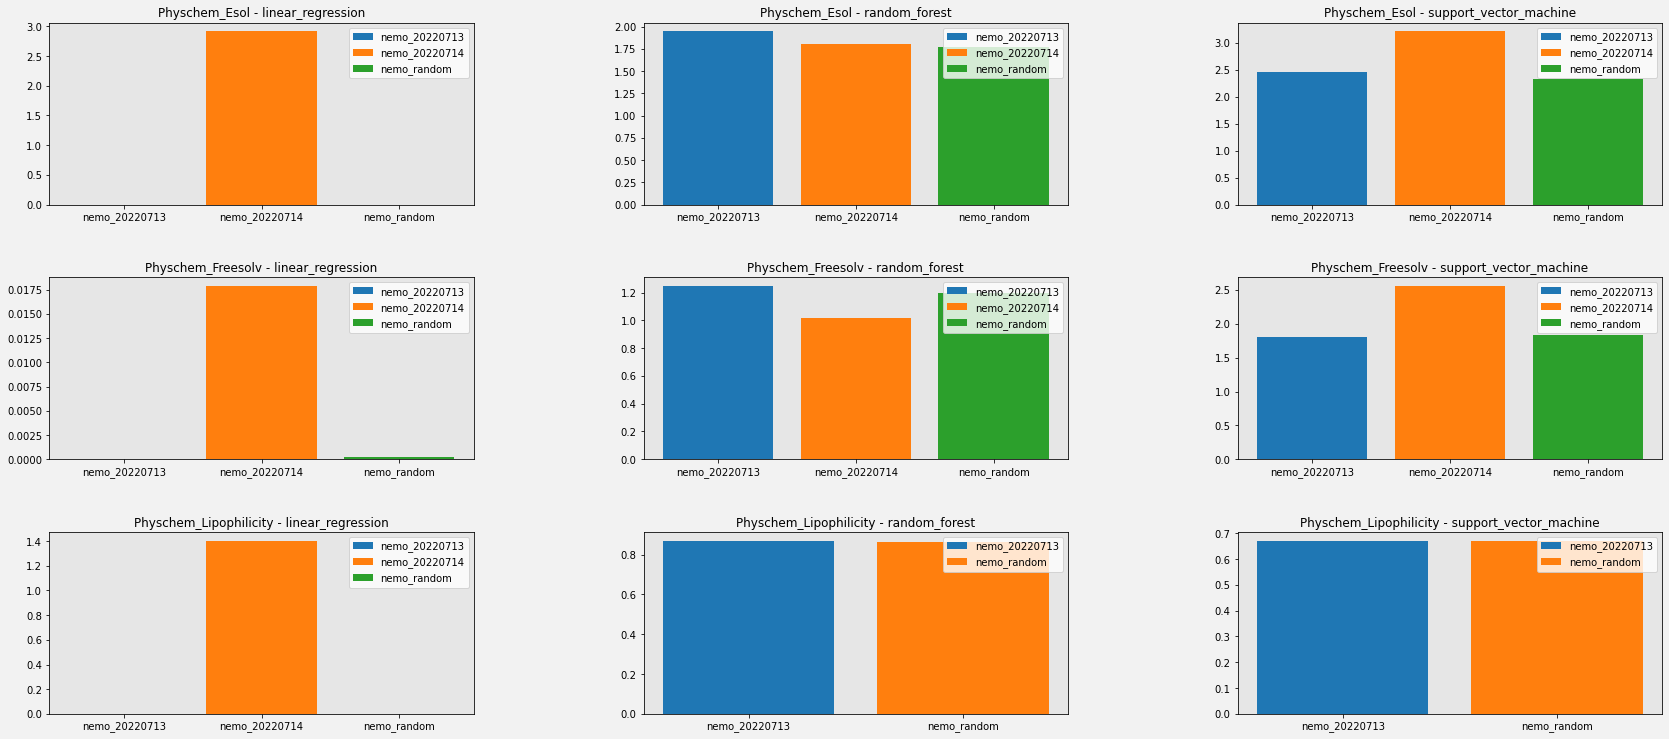

In [4]:
num_plots = 9
plots_per_row = 3
rows = math.ceil(num_plots / plots_per_row)
fig = plt.figure(figsize=(28, (rows * 4)), facecolor=(.95, .95, .95))
axs = fig.subplots(math.ceil(num_plots / plots_per_row), 
                   math.ceil(num_plots / rows))


def plot_physchem(i, axs, model, model_df):
    axs.set_title(f'{name.title()} - {model}')
    axs.set_facecolor((.9, .9, .9))

    exp_names = []
    for exp_name, plt_df in model_df.groupby(by=['exp_name']):
        labels = plt_df['exp_name']
        values = plt_df['value']
        axs.bar(labels, values)
        exp_names.append(exp_name)

    axs.legend(exp_names)

merged_axs = [elem for sublist in axs for elem in sublist]

i = 0
for kpi in kpis:
    files = sorted(glob.glob(os.path.join(reports_dir, f'*-{kpi}*.csv'),
                             recursive=False))
    data_df = pd.concat(load_files(files))
    data_df = data_df[data_df['model'].str.contains('linear_regression_y_*',regex=True) == False]
    for name, name_df in data_df.groupby(by=['name']):
        for model, model_df in name_df.groupby(by=['model']):
            plot_physchem(i, merged_axs[i], model, model_df)
            i = i + 1
model_df[['name', 'model', 'exp_name', 'value']]
fig.show()
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.savefig('embedding_metrics_physchem.png')